In [1]:
import pandas as pd

df = pd.read_excel('world.xlsx', sheet_name='Sheet1') 
df[['name','abbreviation']] = df.groupby('Source region')[['name','abbreviation']].ffill()

# Aggregate total alumni counts by school region and destination country
region_dest = df.groupby(['Source region','Target region'])['Count'].sum().reset_index()

# Filter out local placements (where destination country equals the region, e.g., Hong Kong to Hong Kong)
#It is also important in network analysis, this is the part of whether it is self-connected
region_dest = region_dest[~((region_dest['Source region']=='HKG') & (region_dest['Target region']=='Hong Kong'))]
region_dest = region_dest[~((region_dest['Source region']=='SGP') & (region_dest['Target region']=='Singapore'))]

region_dest['Target region'] = region_dest['Target region'].replace({
    'China': 'Mainland China',
    'Taiwan': 'Taiwan Region'
})


# Top 10 destinations for Hong Kong alumni
hk_top10 = region_dest[region_dest['Source region']=='HKG'].nlargest(10, 'Count')
# Top 10 destinations for Singapore alumni
sg_top10 = region_dest[region_dest['Source region']=='SGP'].nlargest(10, 'Count')

print("Top destinations (Hong Kong alumni):")
print(hk_top10[['Target region','Count']].to_string(index=False))
print("\nTop destinations (Singapore alumni):")
print(sg_top10[['Target region','Count']].to_string(index=False))

Top destinations (Hong Kong alumni):
 Target region  Count
 United States 165000
United Kingdom  51500
        Canada  36160
Mainland China  34450
     Singapore  16320
     Australia  14980
        France  12980
       Germany  10390
         Japan   7020
 Taiwan Region   5960

Top destinations (Singapore alumni):
 Target region  Count
 United States 236800
        Canada  30000
        France  19800
United Kingdom  19400
     Hong Kong  14000
Mainland China  12300
         India  12100
     Australia  11800
       Germany  10900
         Japan   7730


In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Total number of alumni surveyed in Hong Kong and Singapore

In [4]:
df.groupby('Source region')['Count'].sum()

Source region
HKG    1043050
SGP    1046780
Name: Count, dtype: int64

### Top 10 destinations for Hong Kong and Singapore alumni

In [6]:
hk_top10

,Source region,Target region,Count
218,HKG,United States,165000
217,HKG,United Kingdom,51500
36,HKG,Canada,36160
42,HKG,Mainland China,34450
183,HKG,Singapore,16320
12,HKG,Australia,14980
69,HKG,France,12980
74,HKG,Germany,10390
99,HKG,Japan,7020
200,HKG,Taiwan Region,5960


In [7]:
sg_top10

,Source region,Target region,Count
449,SGP,United States,236800
267,SGP,Canada,30000
300,SGP,France,19800
448,SGP,United Kingdom,19400
319,SGP,Hong Kong,14000
273,SGP,Mainland China,12300
322,SGP,India,12100
243,SGP,Australia,11800
305,SGP,Germany,10900
330,SGP,Japan,7730


### Comparison chart

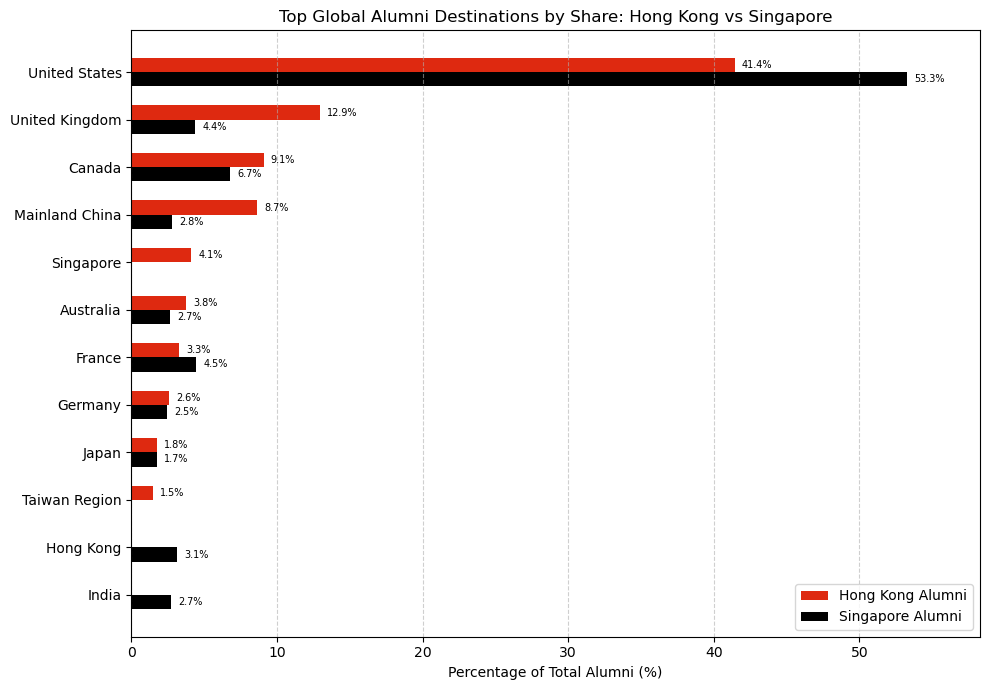

In [19]:
# Calculate total alumni for each region
hk_total = region_dest[region_dest['Source region'] == 'HKG']['Count'].sum()
sg_total = region_dest[region_dest['Source region'] == 'SGP']['Count'].sum()

# Add percentage columns
hk_top10['Percentage'] = hk_top10['Count'] / hk_total * 100
sg_top10['Percentage'] = sg_top10['Count'] / sg_total * 100

# Merge destination countries
all_dest = pd.concat([hk_top10, sg_top10])['Target region'].unique()
percent_df = pd.DataFrame({'Target region': all_dest})
percent_df = percent_df.merge(
    hk_top10[['Target region', 'Percentage']].rename(columns={'Percentage': 'Hong Kong'}),
    on='Target region',
    how='left'
)
percent_df = percent_df.merge(
    sg_top10[['Target region', 'Percentage']].rename(columns={'Percentage': 'Singapore'}),
    on='Target region',
    how='left'
)
percent_df.fillna(0, inplace=True)
percent_df = percent_df.sort_values('Hong Kong', ascending=False) #Descending

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))
y_pos = np.arange(len(percent_df))
bar_width = 0.3 #Bar Thickness change

bars_hk = ax.barh(y_pos - bar_width/2, percent_df['Hong Kong'], height=bar_width, label='Hong Kong Alumni',color='#de2910')
bars_sg = ax.barh(y_pos + bar_width/2, percent_df['Singapore'], height=bar_width, label='Singapore Alumni',color='black')

# Add labels
for bar in bars_hk:
    width = bar.get_width()
    if width > 0:
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center', fontsize=7)

for bar in bars_sg:
    width = bar.get_width()
    if width > 0:
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center', fontsize=7)

ax.set_xlim(0, max(percent_df[['Hong Kong', 'Singapore']].max()) + 5)
ax.set_yticks(y_pos)
ax.set_yticklabels(percent_df['Target region'])
ax.invert_yaxis()
ax.set_xlabel('Percentage of Total Alumni (%)')
ax.set_title('Top Global Alumni Destinations by Share: Hong Kong vs Singapore')
ax.legend(loc='lower right')
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('alumni_destination_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

The bar chart shows the distribution of Hong Kong and Singapore alumni in major study abroad destinations around the world, measured by their share of the total number of alumni.
- The United States is the most popular study abroad destination for both regions, with 41.4% of Hong Kong alumni and 53.3% of Singapore alumni choosing the United States. This highlights the continued dominance of the United States as a hub for higher education and employment for East Asian graduates.
- The United Kingdom is particularly popular among Hong Kong alumni (12.9%), more than twice that of Singapore alumni (4.4%), reflecting the UK's colonial history with Hong Kong and familiarity with British institutions.
- Mainland China: Hong Kong alumni account for 8.7% of the total, while Singapore alumni account for 2.8%, indicating a higher dependence between Hong Kong and mainland China. (Taught postgraduates return to mainland employment)
- Hong Kong and Singapore appear in each other's top ten alumni, but in different proportions. In general, more alumni from Hong Kong go to Singapore (4.1%), while fewer alumni from Singapore choose Hong Kong (3.1%)

**can also add other findings**

Image description
- The bar chart reflects standardized percentages, not raw alumni numbers, so that two regions with different total alumni numbers are comparable.
- The color scheme reflects symbolic regional characteristics (red for Hong Kong, neutral dark for Singapore).